In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
init_data = pd.read_csv("diabetes.csv")
init_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


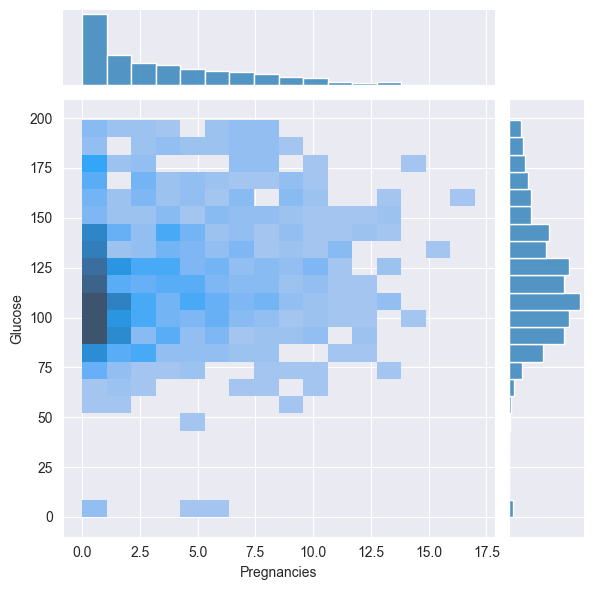

In [16]:
sns.jointplot(x=init_data.columns[0], y=init_data.columns[1], data=init_data, kind="hist")


<Axes: >

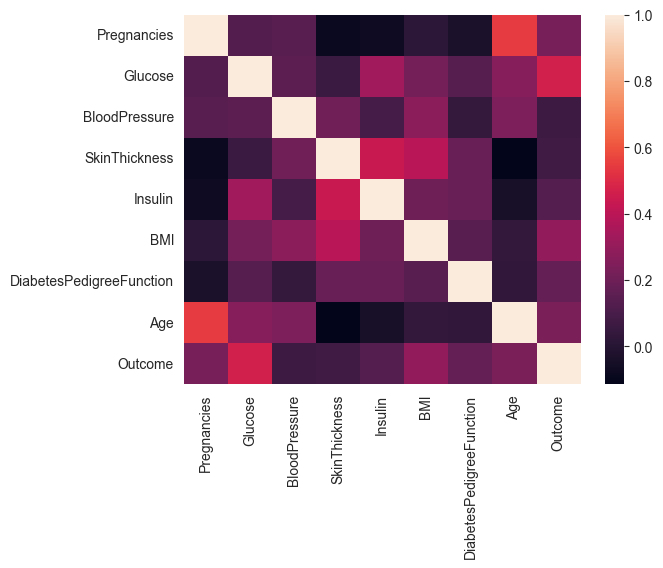

In [18]:
sns.heatmap(init_data.corr())

In [19]:
init_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
data = init_data.copy().drop(["Outcome"], axis=1)
data.head()
def f(x):
    if x == 1:
        return "Yes"
    else:
        return "No"
y = init_data.copy().Outcome.apply(lambda x: f(x))
y

0      Yes
1       No
2      Yes
3       No
4      Yes
      ... 
763     No
764     No
765     No
766    Yes
767     No
Name: Outcome, Length: 768, dtype: object

In [74]:
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [75]:
model = LogisticRegression()
model.fit(data_train, y_train)
print(model.coef_)

[[ 0.12799381  0.03728979 -0.01478151  0.00209903 -0.00168234  0.0841017
   0.66101577  0.00998975]]


D:\All Python\Summer Project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
model.score(data_test,y_test)

0.7987012987012987

In [73]:
from sklearn.metrics import classification_report
y_pre = model.predict(data_test)
# print(y_pre)
print(classification_report(y_test, y_pre))

['Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'Yes' 'No' 'Yes' 'No']
              precision    recall  f1-score   support

          No       0.76      0.86      0.81        95
         Yes       0.72      0.56      0.63        59

    acc